In [21]:
import os
import django
from django.db import connection
import sys
import datetime
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'activity_viewer.settings')
django.setup()

In [22]:
from dashboard.models import Log
from django.db.models import Count

                count
ip                   
18.236.254.201   6753
34.214.118.91    6753
34.208.214.64    6753
35.165.135.243   6753
52.26.49.245     6753
131.175.120.88   5728
52.37.136.160    5183
130.91.43.137    3412
111.53.95.151    2136
203.252.103.12   2008


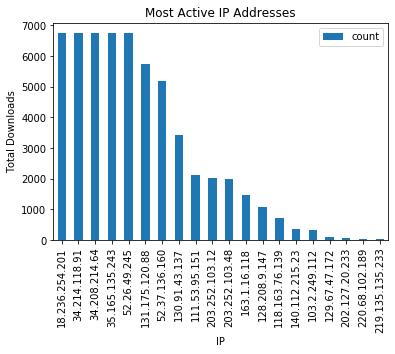

In [23]:
ip_addresses = Log.objects.values_list('ip_address').filter(http_status=200)
# Group by ip address using the Django ORM to query
ip_address_totals = ip_addresses.annotate(count=Count('ip_address')).order_by('-count')
ip_address_totals_df = pd.DataFrame(ip_address_totals, columns=['ip', 'count'])
ip_address_totals_df.set_index('ip', inplace=True)
print(ip_address_totals_df.head(10))
axes = ip_address_totals_df.head(20).plot(kind='bar')
axes.set(xlabel='IP', ylabel='Total Downloads', title='Most Active IP Addresses')
plt.show()

As we can see, this does not paint the whole picture. There are a lot of ip addresses that download a small amount of data, usually specific files.

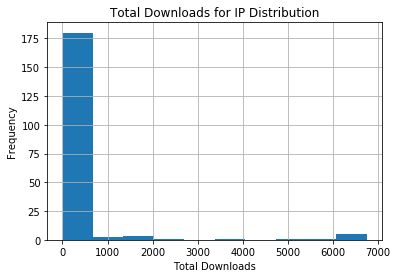

In [24]:
ip_addresses_df = pd.DataFrame(ip_addresses, columns=['ip'])
axes = ip_addresses_df.groupby(by='ip').size().sort_values(ascending=False).hist()
axes.set(xlabel='Total Downloads', ylabel='Frequency', title='Total Downloads for IP Distribution')
plt.show()
